Display first Five rows of dataset: 
   UID Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0   

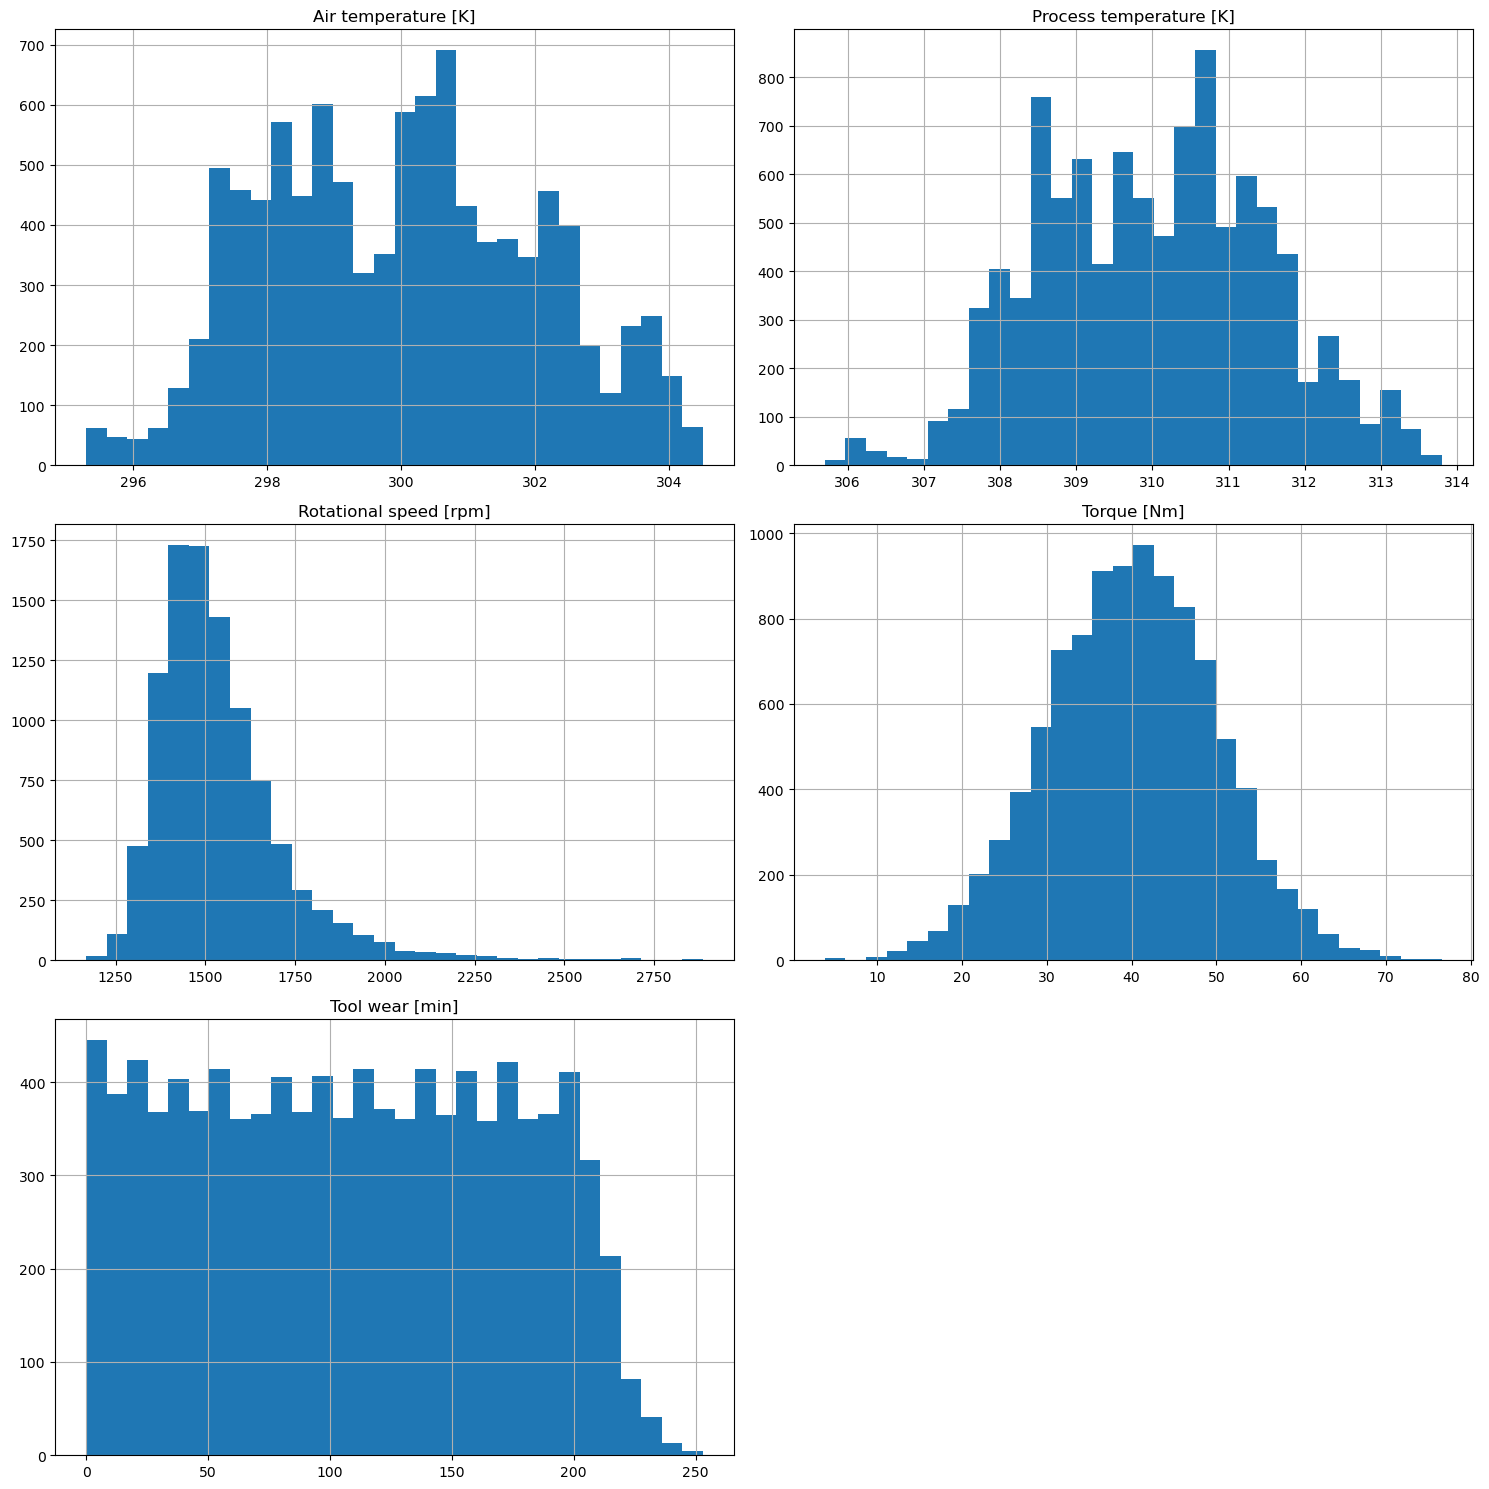

Unique product type value: 
['M' 'L' 'H']

Occurrences of each product type: 
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


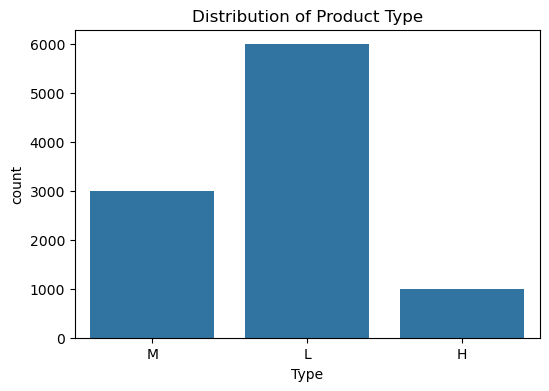


Machine Failure Distribution:
 Machine failure
0    9661
1     339
Name: count, dtype: int64
Machine Failure percentage Distribution:
 Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

Specific Fault Counts: 
TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64

First five rows of Faulty Machine: 
     UID Product ID Type  Air temperature [K]  Process temperature [K]  \
50    51     L47230    L                298.9                    309.1   
69    70     L47249    L                298.9                    309.0   
77    78     L47257    L                298.8                    308.9   
160  161     L47340    L                298.4                    308.2   
161  162     L47341    L                298.3                    308.1   
168  169     L47348    L                298.4                    308.3   
194  195     M15054    M                298.2                    308.5   
207  208     M15067    M                298.4                    308.

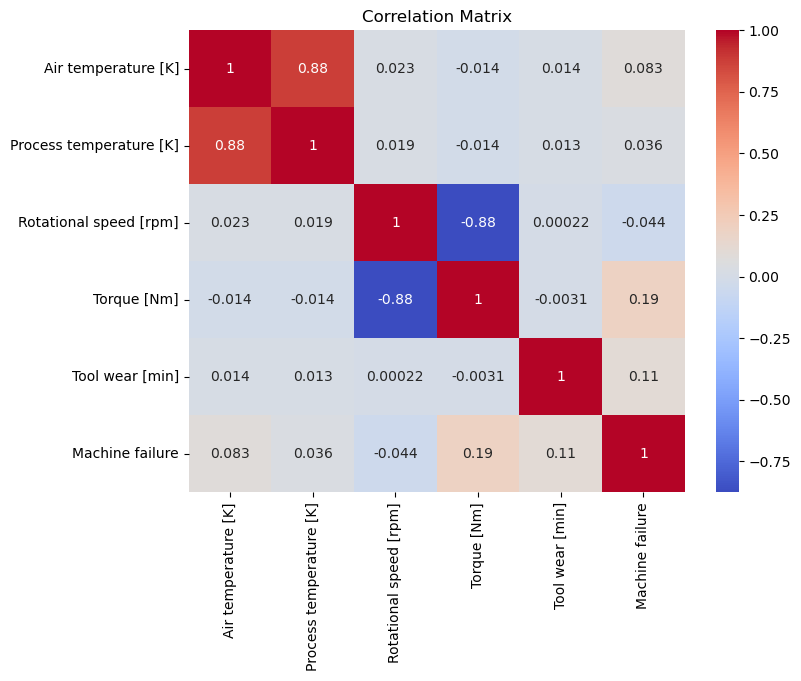


Checking for Linear correlation
Correlationbetween new engineered features and machine failure: 
Power        0.176039
Strain       0.190427
Temp_Diff   -0.111676
dtype: float64

Updated dataframe with engineered features: 
   UID Product ID  Air temperature [K]  Process temperature [K]  \
0    1     M14860                298.1                    308.6   
1    2     L47181                298.2                    308.7   
2    3     L47182                298.1                    308.5   
3    4     L47183                298.2                    308.6   
4    5     L47184                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5          

In [22]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib
from matplotlib import pyplot as plt
import seaborn as sns

"""Load the dataset from the given path."""
path = r"C:\Users\PC\Desktop\Ai4i2020\ai4i2020.csv"

# Read the AI4I dataset from a CSV file into a pandas DataFrame
ai4i = pd.read_csv(path)
print(f"Display first Five rows of dataset: \n{ai4i.head()}")
# Display information about the ai4i dataframe
# This shows the number of rows, columns, column names, data types, and memory usage
print("\nInformation about the dataset: ")
print(ai4i.info())

#Preprocessing
# Check for duplicate rows in the ai4i dataframe and return the count of duplicates
print("\nNumber of duplicate rows in the ai4i dataframe:")
print(ai4i.duplicated().sum())
# Check for missing values in the ai4i dataframe
print(f"\nNumber of missing value in the ai4i dataset: \n{ai4i.isnull().sum()}")

##EDA 
#Summary Statictics 
print("\nSummary Statictic")
print(ai4i.describe().T)

# Define numerical columns for analysis
print("\nRaw features distribution")
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
# Create histograms for all numerical features to visualize their distributions
ai4i[numerical_cols].hist(bins=30, figsize=(15, 15))
plt.tight_layout()
plt.show()

# Check how many unique product types exist in the dataset
ai4i["Type"].nunique()
# Display the unique product type values
print(f"Unique product type value: \n{ai4i["Type"].unique()}")
# Count the occurrences of each product type
print(f"\nOccurrences of each product type: \n{ai4i["Type"].value_counts()}")

# Calculate the percentage distribution of product types
ai4i["Type"].value_counts(normalize=True)

# Create a bar plot to visualize the distribution of product types
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=ai4i)
plt.title("Distribution of Product Type")
plt.show()

# Display the count of machine failures vs non-failures
print("\nMachine Failure Distribution:\n", ai4i['Machine failure'].value_counts())
# Display the percentage of machine failures vs non-failures
print("Machine Failure percentage Distribution:\n", ai4i['Machine failure'].value_counts(normalize=True))

# Define columns representing specific fault types
fault_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# Count the occurrences of each specific fault type
print(f"\nSpecific Fault Counts: \n{ai4i[fault_cols].sum()}")

# Create a subset containing only the machines that failed
faulty_mac = ai4i[ai4i["Machine failure"]==1]

# Display the first 5 rows of the failed machines dataset
print(f"\nFirst five rows of Faulty Machine: \n{faulty_mac.head(10)}")

# Initialize the encoder with appropriate parameters
# - handle_unknown="ignore": Ignores unknown categories during transform
# - sparse_output=False: Returns a dense array instead of sparse matrix
# - set_output(transform="pandas"): Returns a pandas DataFrame
onehotencoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas") 
# Apply one-hot encoding to the "Type" column
enc = onehotencoder.fit_transform(ai4i[["Type"]])
# Concatenate the encoded columns to the original dataframe and drop the original "Type" column
ai4i = pd.concat([ai4i,enc],axis=1).drop(columns=["Type"])
# Display the first few rows of the ai4i dataframe
ai4i.head()

# Define numerical features including one-hot encoded type columns
num_ft = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']
# Calculate correlation between numerical features and machine failure
correlation = ai4i[num_ft].corrwith(ai4i["Machine failure"])
print("\nChecking for Linear correlation")
print(f"Correlation between numerical features and machine failure: \n{correlation} ")

# Create a correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ai4i[numerical_cols + ['Machine failure']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#Feature Engineering
# Calculate temperature difference between process and air temperature
# HDF (Heat Dissipation Failure) rule: difference < 8.6K is risky, especially when speed < 1380rpm
ai4i["Temp_Diff"] = ai4i["Process temperature [K]"] - ai4i["Air temperature [K]"] 

# Calculate power from torque and rotational speed (W = τ × ω)
# PWF (Power Failure) rule: power <3500W or >9000W indicates potential failure
ai4i["Power"] = ai4i["Torque [Nm]"] * ai4i["Rotational speed [rpm]"] * (2*3.142)/60

# Calculate strain as product of tool wear and torque
# OSF (Overstrain Failure) rule thresholds: H = 13000 minNm, M = 12000 minNm, L = 11000 minNm
ai4i["Strain"] = ai4i["Tool wear [min]"] * ai4i["Torque [Nm]"]

# List of newly engineered features
new_Ft = ["Power","Strain", "Temp_Diff"]

# Display first 10 rows of the new features
ai4i[new_Ft].head(10)

# Calculate correlation between new engineered features and machine failure
new_ft_correlation = ai4i[new_Ft].corrwith(ai4i["Machine failure"])

# Display the correlation values
print("\nChecking for Linear correlation")
print(f"Correlationbetween new engineered features and machine failure: \n{new_ft_correlation}")

# Display the updated dataframe with engineered features
print(f"\nUpdated dataframe with engineered features: \n{ai4i.head()}")

#MODEL TRAINING 
# Original numerical features from the dataset
Original_numeric = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
# One-hot encoded categorical features
Categorical_onehot = enc
# Newly engineered numerical features
Engineered_numeric = new_Ft

# Define features for the model
features = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
    "Type_H",                # One-hot encoded machine type H
    "Type_L",                # One-hot encoded machine type L
    "Type_M",                # One-hot encoded machine type M
    "Temp_Diff",             # Calculated temperature difference
    "Power",                 # Calculated power feature
    "Strain"                 # Calculated strain feature
]

# Define target variable
target = "Machine failure"

# Extract features and target from dataset
X = ai4i[features]
y = ai4i[target]

# Display target variable and feature shape
print("\ntarget variable and Features data shape respectively",y.shape, X.shape)

# Split data into training and testing sets (80/20 split)
# stratify=y ensures class distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=12
)

# Display shapes of training and testing sets
print(f"\nTraining set shape: {X_train.shape}, Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}, Testing labels shape: {y_test.shape}")

# Handle class imbalance using SMOTE
# sampling_strategy=0.5 means minority class will be 50% of majority class after resampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compare class distribution before and after SMOTE
print("\nClass distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

# Initialize Random Forest Classifier with parameters
# class_weight="balanced" helps with imbalanced classes
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=12)

# Train the model on resampled data
rfc.fit(X_train_resampled, y_train_resampled)

# Make predictions on test set
y_pred = rfc.predict(X_test)

# Convert predictions to DataFrame for inspection
pred_df = pd.DataFrame(y_pred, columns=['Prediction'])
print("\nSample predictions:")
print(pred_df.head(10))

# Display actual values for comparison
print("Sample actual values:")
print(y_test.head(10))

# Evaluate model performance
print("\n=== RandomForest Results (Clean) ===")
# Calculate and display accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# Calculate and display ROC AUC 
auc = roc_auc_score(y_test, y_pred)
print(f"roc_auc_score: {(auc):.3f}")

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Prepare model data for saving (includes model and feature information)
model_data = {
    'model': rfc,
    'feature_order': X_train.columns.tolist(),
    'feature_dtypes': X_train.dtypes.to_dict()
}

# Save model to disk
joblib.dump(model_data, 'ai4i2020_rfc_M1.pkl')
# Confirm model has been saved
print("\nModel is saved as: ai4i2020_rfc_M1.pkl ")

